<a href="https://colab.research.google.com/github/ParkGeunHae/miniproject2/blob/main/%EC%98%AC%EB%A6%BC%ED%94%BD%EB%A9%94%EB%8B%AC%EC%A7%91%EA%B3%84_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')    # 코랩에서 사용
# plt.rc('font', family='Malgun Gothic')    # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정적 크롤링과 전처리

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime
import re             #정규표현식 모듈


FILE = './olympic_medals.csv'

def medal_total(result):
    cnt = 0
    medal_url = 'https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84'
    print(medal_url)
    html = urllib.request.urlopen(medal_url)
    soupmedals = BeautifulSoup(html, 'html.parser')
    tag_tbody = soupmedals.find('tbody')

    for olim in tag_tbody.find_all('tr'):
        olim_td = olim.find_all('td')
        if len(olim_td) < 16:  # 확인: 적어도 16개의 열이 있어야 함
            continue

        #html요소에서 텍스트를 추출하고(get_text) 좌우 공백 제거(strip)
        #하계정보
        country_name = re.sub(r'\s*\[[^]]*\]', '', olim_td[0].get_text().strip())  #정규표현식 사용하여 []안의 내용 제거함
        summer_count = olim_td[1].get_text().strip()
        gold_s = olim_td[2].get_text().strip()
        silver_s = olim_td[3].get_text().strip()
        bronze_s = olim_td[4].get_text().strip()
        summer_total = olim_td[5].get_text().strip()

        #동계정보
        winter_count = olim_td[6].get_text().strip()
        gold_w = olim_td[7].get_text().strip()
        silver_w = olim_td[8].get_text().strip()
        bronze_w = olim_td[9].get_text().strip()
        winter_total = olim_td[10].get_text().strip()

        #전체정보
        total_count= olim_td[11].get_text().strip()
        gold_t=olim_td[12].get_text().strip()
        silver_t=olim_td[13].get_text().strip()
        bronze_t=olim_td[14].get_text().strip()
        sum_total=olim_td[15].get_text().strip()

        result.append([country_name, summer_count, gold_s, silver_s, bronze_s,summer_total,
                       winter_count,gold_w,silver_w,bronze_w,winter_total,
                       total_count,gold_t,silver_t,bronze_t,sum_total])
        cnt += 1
        print(f"{country_name} {summer_count} {gold_s} {silver_s} {bronze_s} {summer_total} "
              f"{winter_count} {gold_w} {silver_w} {bronze_w} {winter_total} "
              f"{total_count} {gold_t} {silver_t} {bronze_t} {sum_total}")

    return

    #[CODE 0]
def main():
    result = []
    print('올림픽 메달 정보 크롤링 >>>>>>>>>>>>>>>>>>>>>>>>>>')
    medal_total(result)   #[CODE 1] 호출
    medals_tbl = pd.DataFrame(result, columns=('국가(IOC코드)','하계참가횟수', '금_하계','은_하계','동_하계','하계_계',
                                               '동계참가횟수', '금_동계','은_동계','동_동계','동계_계',
                                               '전체참가횟수', '금_전체','은_전체','동_전체','전체_계'))
    medals_tbl.to_csv(FILE, encoding='utf-8', mode='w', index=True)
    del result[:]
    return medals_tbl

df = main()
df

올림픽 메달 정보 크롤링 >>>>>>>>>>>>>>>>>>>>>>>>>>
https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84
아프가니스탄 (AFG) 14 0 0 2 2 0 0 0 0 0 14 0 0 2 2
알제리 (ALG) 13 5 4 8 17 3 0 0 0 0 16 5 4 8 17
아르헨티나 (ARG) 24 21 25 28 74 19 0 0 0 0 43 21 25 28 74
아르메니아 (ARM) 6 2 6 6 14 7 0 0 0 0 13 2 6 6 14
오스트랄라시아 (ANZ) 2 3 4 5 12 0 0 0 0 0 2 3 4 5 12
오스트레일리아 (AUS) 26 147 163 187 497 19 5 5 5 15 45 152 168 192 512
오스트리아 (AUT) 27 18 33 36 87 23 64 81 87 232 50 82 114 123 319
아제르바이잔 (AZE) 6 7 11 24 42 6 0 0 0 0 12 7 11 24 42
바하마 (BAH) 16 6 2 6 14 0 0 0 0 0 16 6 2 6 14
바레인 (BRN) 9 2 1 0 3 0 0 0 0 0 9 2 1 0 3
바베이도스 (BAR) 12 0 0 1 1 0 0 0 0 0 12 0 0 1 1
벨라루스 (BLR) 6 12 27 39 78 7 8 5 5 18 13 20 32 44 96
벨기에 (BEL) 26 40 53 55 148 21 1 2 3 6 47 41 55 58 154
버뮤다 (BER) 18 0 0 1 1 8 0 0 0 0 26 0 0 1 1
보헤미아 (BOH) 3 0 1 3 4 0 0 0 0 0 3 0 1 3 4
보츠와나 (BOT) 10 0 1 0 1 0 0 0 0 0 10 0 1 0 1
브라질 (BRA) 22 30 36 63 129 8 0 0 0 0 30 30 36 63 129
서인도 연방 (BWI) 1 0 0 2 2 0 0 0 0 0 1 0 0 2 2
불가

,국가(IOC코드),하계참가횟수,금_하계,은_하계,동_하계,하계_계,동계참가횟수,금_동계,은_동계,동_동계,동계_계,전체참가횟수,금_전체,은_전체,동_전체,전체_계
0,아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아 (ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,짐바브웨 (ZIM),13,3,4,1,8,1,0,0,0,0,14,3,4,1,8
148,독립 (IOA),3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
149,독립 참가 (IOP),1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
150,러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


###1. 전체 메달 획득 현황 시각화

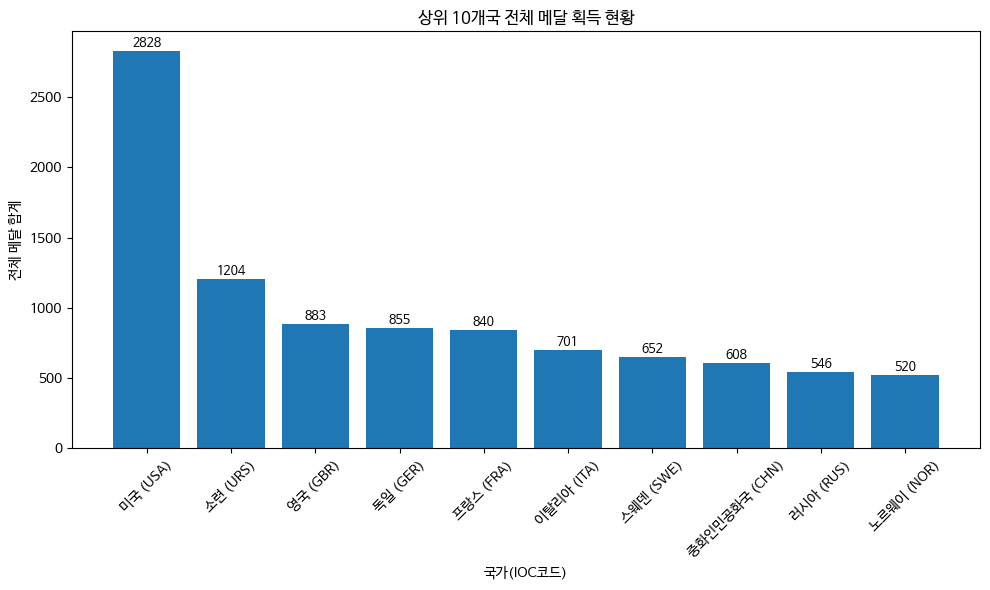

In [6]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# 국가별 전체 메달 합계 계산
total_medals = df.groupby('국가(IOC코드)')['전체_계'].sum().sort_values(ascending=False)

# 상위 10개국 추출
top_10_countries = total_medals.head(10).index

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries, total_medals.loc[top_10_countries])

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)

plt.xlabel('국가(IOC코드)')
plt.ylabel('전체 메달 합계')
plt.title('상위 10개국 전체 메달 획득 현황')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###2.하계 올림픽 vs 동계 올림픽 메달 획득 비교

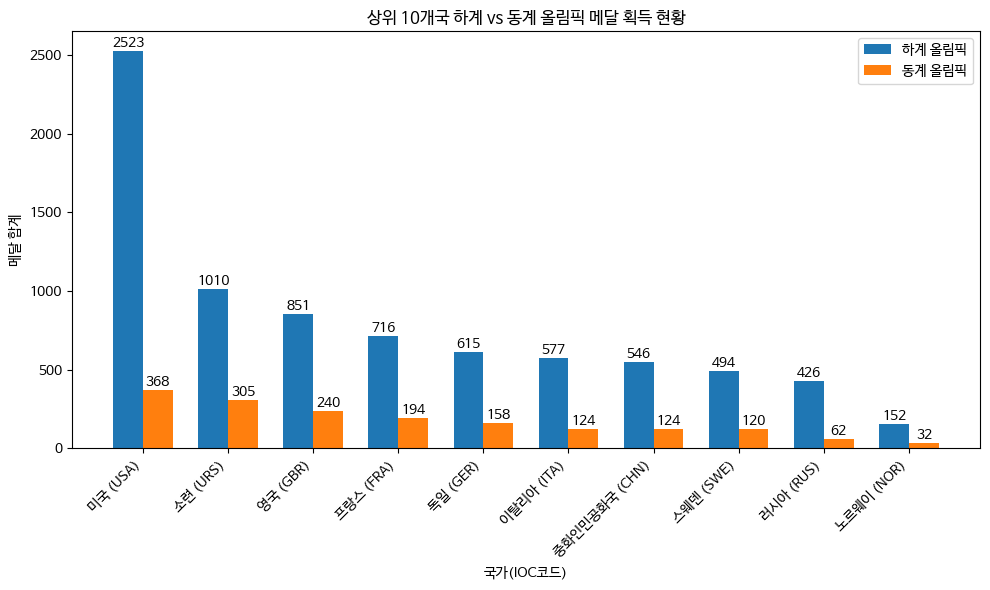

In [8]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# DataFrame의 인덱스를 '국가(IOC코드)' 열로 설정
df = df.set_index('국가(IOC코드)')

# 상위 10개국 선정
top_10_countries = df.groupby(level=0)['전체_계'].sum().sort_values(ascending=False).head(10).index

# 하계 올림픽 메달 합계
summer_medals = df.loc[top_10_countries, '하계_계'].sort_values(ascending=False)

# 동계 올림픽 메달 합계
winter_medals = df.loc[top_10_countries, '동계_계'].sort_values(ascending=False)

# 막대 그래프 시각화
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35  # 바 너비 설정

# 하계 올림픽 바 그래프
bar_positions = np.arange(len(summer_medals))
ax.bar(bar_positions - bar_width / 2, summer_medals.values, bar_width, label='하계 올림픽')

# 동계 올림픽 바 그래프
ax.bar(bar_positions + bar_width / 2, winter_medals.values, bar_width, label='동계 올림픽')

# 바 높이 값 표시
for i, (summer, winter) in enumerate(zip(summer_medals, winter_medals)):
    ax.text(i - bar_width / 2, summer, str(int(summer)), ha='center', va='bottom')
    ax.text(i + bar_width / 2, winter, str(int(winter)), ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(summer_medals.index, rotation=45, ha='right')
ax.legend()
ax.set_xlabel('국가(IOC코드)')
ax.set_ylabel('메달 합계')
ax.set_title('상위 10개국 하계 vs 동계 올림픽 메달 획득 현황')

plt.tight_layout()
plt.show()

###3.국가별 메달 획득 현황 분석

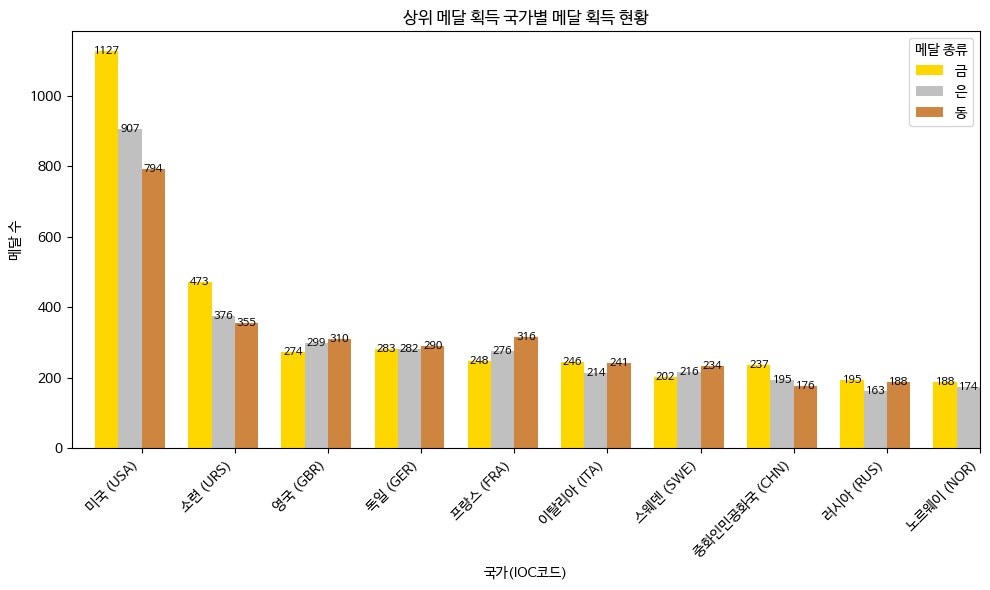

In [14]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# 국가별로 메달 획득 현황을 계산
country_medals = df.groupby('국가(IOC코드)')[['금_전체', '은_전체', '동_전체']].sum()

# 상위 메달 획득 국가를 추출
top_countries = country_medals.sum(axis=1).nlargest(10).index


# 상위 메달 획득 국가의 메달 획득 현황을 시각화
plt.figure(figsize=(10, 6))
ax = plt.gca()

# 브론즈 메달 막대 그리기
country_medals.loc[top_countries]['동_전체'].plot(kind='bar', color='peru', position=0, width=0.25, label='동', ax=ax)

# 은 메달 막대 그리기
country_medals.loc[top_countries]['은_전체'].plot(kind='bar', color='silver', position=1, width=0.25, label='은', ax=ax)

# 골드 메달 막대 그리기
country_medals.loc[top_countries]['금_전체'].plot(kind='bar', color='gold', position=2, width=0.25, label='금', ax=ax)

plt.title('상위 메달 획득 국가별 메달 획득 현황')
plt.xlabel('국가(IOC코드)')
plt.ylabel('메달 수')

# legend 순서 변경
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='메달 종류')

plt.xticks(rotation=45, ha='right')

# 막대 위에 값을 표시
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width/2, y + height), ha='center', va='center', fontsize=8, color='black')

plt.tight_layout() #그림 여백 자동 조정
plt.show()


###4.메달 종류별 획득 현황 분석

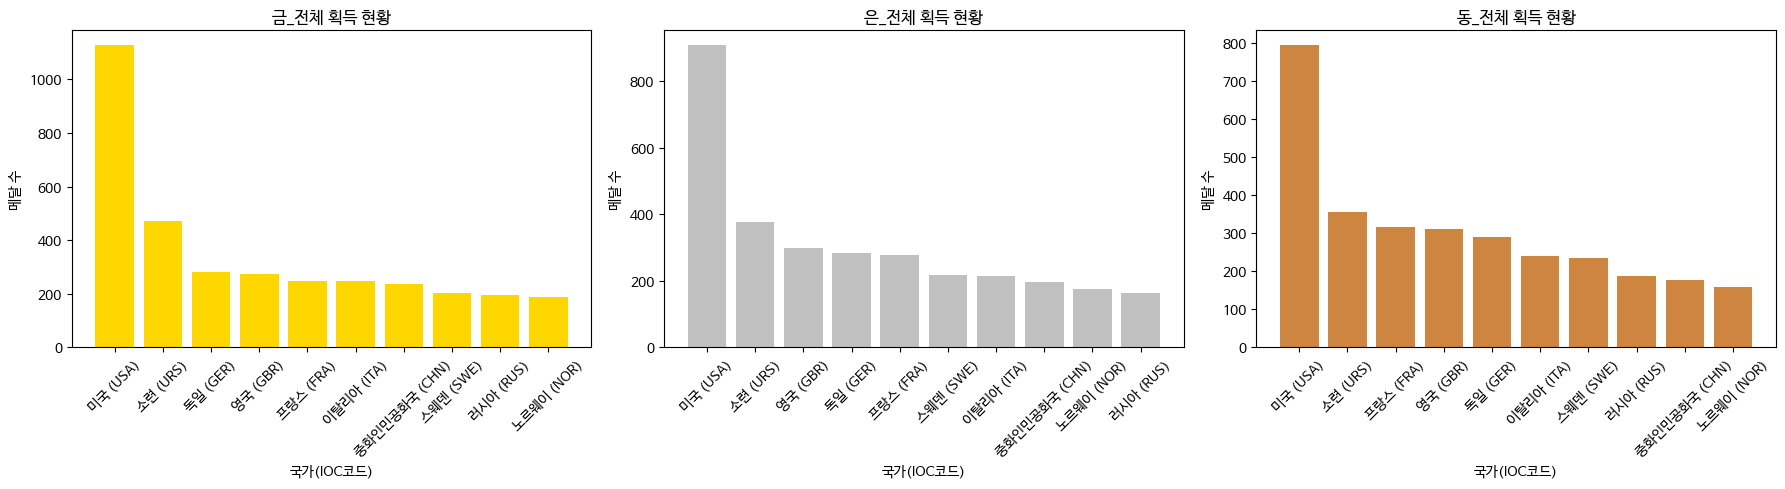

In [21]:
# 국가별 메달 획득 현황 데이터를 읽어옴
df = pd.read_csv(FILE, encoding='utf-8', thousands=',') #thousands=',' 옵션을 사용하여 쉼표 제거

# DataFrame의 인덱스를 '국가(IOC코드)' 열로 설정
df = df.set_index('국가(IOC코드)')

# 상위 10개국 선정
top_10_countries = df.groupby('국가(IOC코드)')['전체_계'].sum().sort_values(ascending=False).head(10).index

# 메달 종류별 획득 현황
medal_types = ['금_전체', '은_전체', '동_전체']
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 메달 종류별 색상 지정
colors = ['gold', 'silver', 'peru']

for i, medal_type in enumerate(medal_types):
    ax = axs[i]
    medal_counts = df.loc[top_10_countries, medal_type].sort_values(ascending=False)
    ax.bar(medal_counts.index, medal_counts.values, color=colors[i])  # 색상 지정
    ax.set_title(f'{medal_type} 획득 현황')
    ax.set_xlabel('국가(IOC코드)')
    ax.set_ylabel('메달 수')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 5.전체 메달 수, 하계 메달 수, 동계 메달 수를 각각 막대 그래프로 시각화

In [22]:
# 전체 메달 수 기준 정렬
df_total_rank = df[['전체_계']].sort_values(by='전체_계', ascending=False)
df_total_rank['전체_순위'] = range(1, len(df_total_rank) + 1)

# 하계 메달 수 기준 정렬
df_summer_rank = df[['하계_계']].sort_values(by='하계_계', ascending=False)
df_summer_rank['하계_순위'] = range(1, len(df_summer_rank) + 1)

# 동계 메달 수 기준 정렬
df_winter_rank = df[['동계_계']].sort_values(by='동계_계', ascending=False)
df_winter_rank['동계_순위'] = range(1, len(df_winter_rank) + 1)

# 결과 출력
print("전체 메달 수 기준 순위")
print(df_total_rank.head(10))
print()

print("하계 메달 수 기준 순위")
print(df_summer_rank.head(10))
print()

print("동계 메달 수 기준 순위")
print(df_winter_rank.head(10))


전체 메달 수 기준 순위
               전체_계  전체_순위
국가(IOC코드)                 
미국 (USA)       2828      1
소련 (URS)       1204      2
영국 (GBR)        883      3
독일 (GER)        855      4
프랑스 (FRA)       840      5
이탈리아 (ITA)      701      6
스웨덴 (SWE)       652      7
중화인민공화국 (CHN)   608      8
러시아 (RUS)       546      9
노르웨이 (NOR)      520     10

하계 메달 수 기준 순위
               하계_계  하계_순위
국가(IOC코드)                 
미국 (USA)       2523      1
소련 (URS)       1010      2
영국 (GBR)        851      3
프랑스 (FRA)       716      4
독일 (GER)        615      5
이탈리아 (ITA)      577      6
중화인민공화국 (CHN)   546      7
오스트레일리아 (AUS)   497      8
스웨덴 (SWE)       494      9
헝가리 (HUN)       491     10

동계 메달 수 기준 순위
             동계_계  동계_순위
국가(IOC코드)               
노르웨이 (NOR)    368      1
미국 (USA)      305      2
독일 (GER)      240      3
오스트리아 (AUT)   232      4
캐나다 (CAN)     199      5
소련 (URS)      194      6
핀란드 (FIN)     167      7
스웨덴 (SWE)     158      8
스위스 (SUI)     153      9
네덜란드 (NED)    130     10


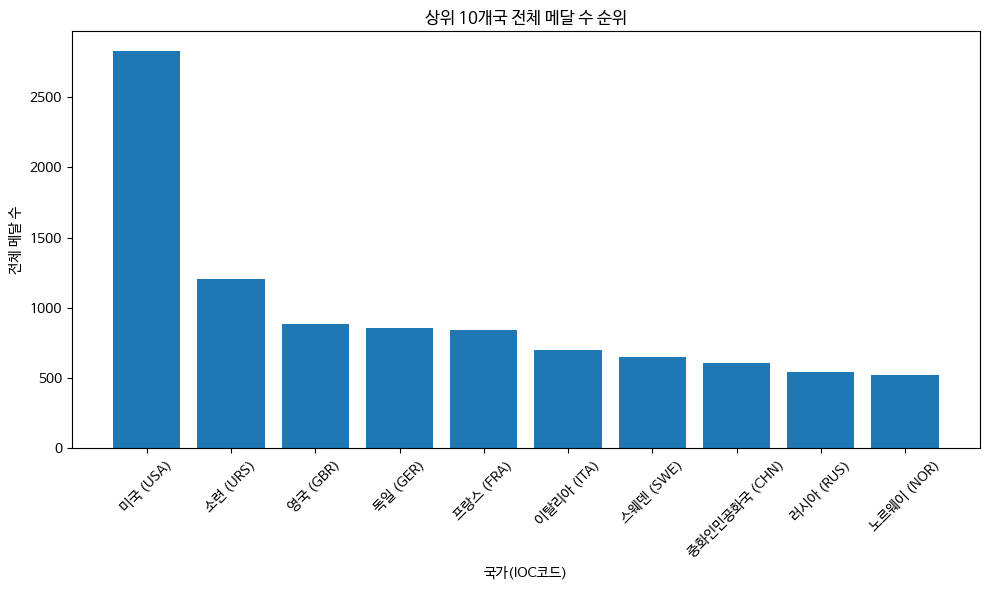

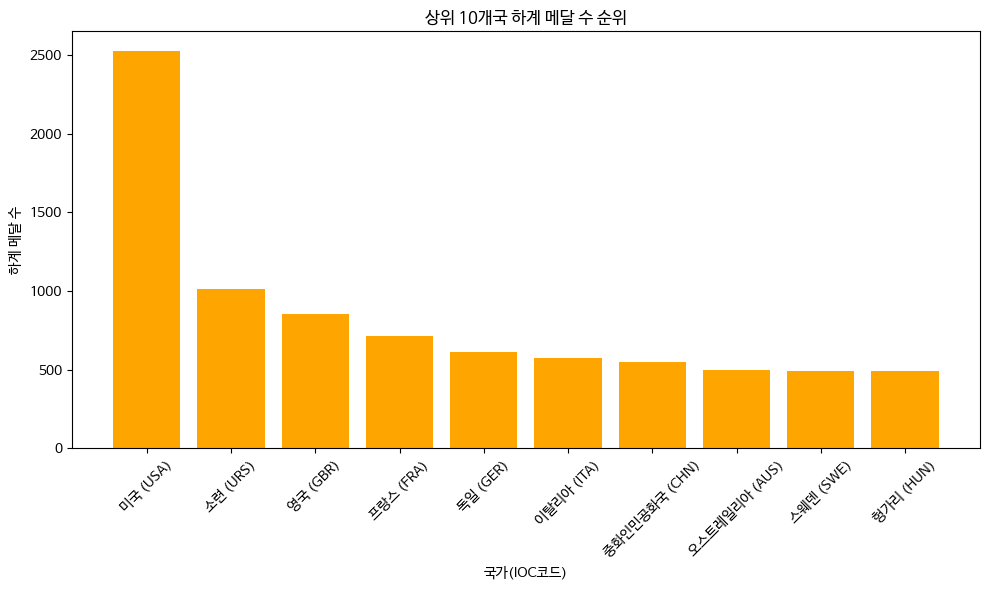

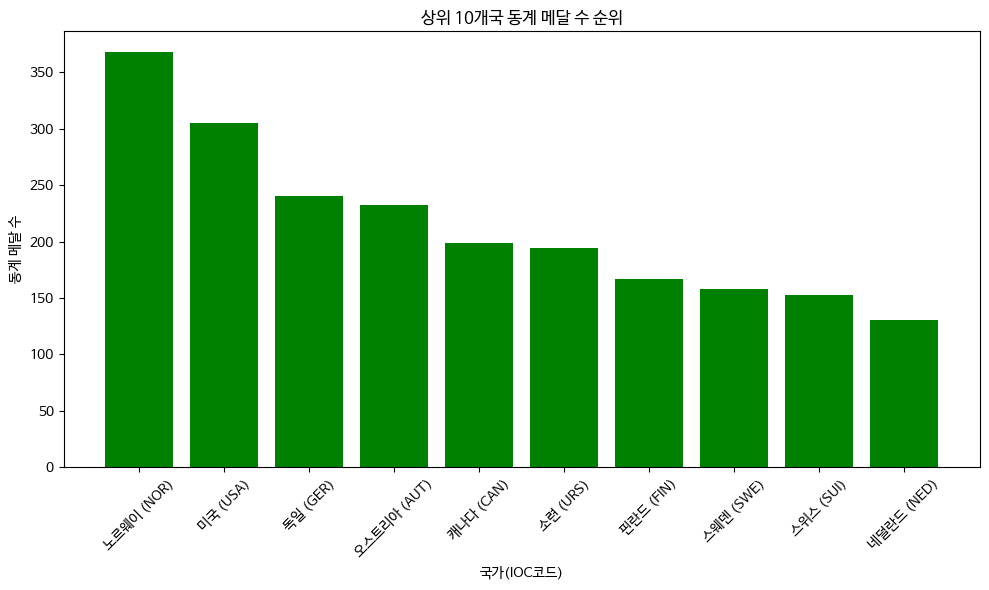

In [23]:
# 전체 메달 수 기준 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_total_rank.head(10).index, df_total_rank['전체_계'].head(10))
plt.xlabel('국가(IOC코드)')
plt.ylabel('전체 메달 수')
plt.title('상위 10개국 전체 메달 수 순위')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 하계 메달 수 기준 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_summer_rank.head(10).index, df_summer_rank['하계_계'].head(10), color='orange')
plt.xlabel('국가(IOC코드)')
plt.ylabel('하계 메달 수')
plt.title('상위 10개국 하계 메달 수 순위')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 동계 메달 수 기준 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_winter_rank.head(10).index, df_winter_rank['동계_계'].head(10), color='green')
plt.xlabel('국가(IOC코드)')
plt.ylabel('동계 메달 수')
plt.title('상위 10개국 동계 메달 수 순위')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
# 전체 메달 수 기준 정렬
df_total_rank = df[['전체_계']].sort_values(by='전체_계', ascending=False)
df_total_rank['전체_순위'] = range(1, len(df_total_rank) + 1)

# 하계 메달 수 기준 정렬
df_summer_rank = df[['하계_계']].sort_values(by='하계_계', ascending=False)
df_summer_rank['하계_순위'] = range(1, len(df_summer_rank) + 1)

# 동계 메달 수 기준 정렬
df_winter_rank = df[['동계_계']].sort_values(by='동계_계', ascending=False)
df_winter_rank['동계_순위'] = range(1, len(df_winter_rank) + 1)

# 결과 출력
print("전체 메달 수 기준 순위")
print(df_total_rank)
print()

print("하계 메달 수 기준 순위")
print(df_summer_rank)
print()

print("동계 메달 수 기준 순위")
print(df_winter_rank)


전체 메달 수 기준 순위
           전체_계  전체_순위
국가(IOC코드)             
미국 (USA)   2828      1
소련 (URS)   1204      2
영국 (GBR)    883      3
독일 (GER)    855      4
프랑스 (FRA)   840      5
...         ...    ...
지부티 (DJI)     1    148
사모아 (SAM)     1    149
요르단 (JOR)     1    150
세네갈 (SEN)     1    151
코소보 (KOS)     1    152

[152 rows x 2 columns]

하계 메달 수 기준 순위
                     하계_계  하계_순위
국가(IOC코드)                       
미국 (USA)             2523      1
소련 (URS)             1010      2
영국 (GBR)              851      3
프랑스 (FRA)             716      4
독일 (GER)              615      5
...                   ...    ...
요르단 (JOR)               1    148
세네갈 (SEN)               1    149
사모아 (SAM)               1    150
리히텐슈타인 (LIE)            0    151
러시아 출신 올림픽 선수 (OAR)     0    152

[152 rows x 2 columns]

동계 메달 수 기준 순위
             동계_계  동계_순위
국가(IOC코드)               
노르웨이 (NOR)    368      1
미국 (USA)      305      2
독일 (GER)      240      3
오스트리아 (AUT)   232      4
캐나다 (CAN)     199      5
...  

In [32]:
# 전체 메달 수 기준 정렬
df_total_rank = df[['전체_계']].sort_values(by='전체_계', ascending=False)
df_total_rank['전체_순위'] = range(1, len(df_total_rank) + 1)
df_total_rank = df_total_rank.reset_index()

# 결과를 CSV 파일로 저장
total_output_file = 'total_medal_rank.csv'
df_total_rank.to_csv(total_output_file, index=False)
print(f"전체 메달 수 기준 순위를 '{total_output_file}'에 저장했습니다.")
print("전체 메달 수 기준 순위")
print(df_total_rank)

# 하계 메달 수 기준 정렬
df_summer_rank = df[['하계_계']].sort_values(by='하계_계', ascending=False)
df_summer_rank['하계_순위'] = range(1, len(df_summer_rank) + 1)
df_summer_rank = df_summer_rank.reset_index()

# 결과를 CSV 파일로 저장
summer_output_file = 'summer_medal_rank.csv'
df_summer_rank.to_csv(summer_output_file, index=False)
print(f"하계 메달 수 기준 순위를 '{summer_output_file}'에 저장했습니다.")
print("하계 메달 수 기준 순위")
print(df_summer_rank)

# 동계 메달 수 기준 정렬
df_winter_rank = df[['동계_계']].sort_values(by='동계_계', ascending=False)
df_winter_rank['동계_순위'] = range(1, len(df_winter_rank) + 1)
df_winter_rank = df_winter_rank.reset_index()

# 결과를 CSV 파일로 저장
winter_output_file = 'winter_medal_rank.csv'
df_winter_rank.to_csv(winter_output_file, index=False)
print(f"동계 메달 수 기준 순위를 '{winter_output_file}'에 저장했습니다.")
print("동계 메달 수 기준 순위")
print(df_winter_rank)


전체 메달 수 기준 순위를 'total_medal_rank.csv'에 저장했습니다.
전체 메달 수 기준 순위
               국가(IOC코드)  전체_계  전체_순위
0               미국 (USA)  2828      1
1               소련 (URS)  1204      2
2               영국 (GBR)   883      3
3               독일 (GER)   855      4
4              프랑스 (FRA)   840      5
5             이탈리아 (ITA)   701      6
6              스웨덴 (SWE)   652      7
7          중화인민공화국 (CHN)   608      8
8              러시아 (RUS)   546      9
9             노르웨이 (NOR)   520     10
10              동독 (GDR)   519     11
11         오스트레일리아 (AUS)   512     12
12             캐나다 (CAN)   501     13
13             헝가리 (HUN)   498     14
14              일본 (JPN)   497     15
15             핀란드 (FIN)   470     16
16            네덜란드 (NED)   415     17
17             스위스 (SUI)   345     18
18            대한민국 (KOR)   337     19
19           오스트리아 (AUT)   319     20
20            루마니아 (ROU)   307     21
21             폴란드 (POL)   306     22
22              서독 (FRG)   243     23
23              쿠바 (CUB)   

In [41]:
# 대한민국 정보 찾기
korea_row = df.loc[df.index == '대한민국 (KOR)']

if not korea_row.empty:
    korea_total_rank = df_total_rank.loc[df_total_rank['국가(IOC코드)'] == '대한민국 (KOR)']['전체_순위'].values[0]
    korea_summer_rank = df_summer_rank.loc[df_summer_rank['국가(IOC코드)'] == '대한민국 (KOR)']['하계_순위'].values[0]
    korea_winter_rank = df_winter_rank.loc[df_winter_rank['국가(IOC코드)'] == '대한민국 (KOR)']['동계_순위'].values[0]

    print("대한민국")
    print(f"전체 메달 순위: {korea_total_rank}")
    print(f"하계 메달 순위: {korea_summer_rank}")
    print(f"동계 메달 순위: {korea_winter_rank}")
    print()

    # 전체 순위 정보를 포함한 데이터프레임 만들기
    df_with_rank = df.merge(df_total_rank[['국가(IOC코드)', '전체_순위']], left_index=True, right_on='국가(IOC코드)')

    # 대한민국과 비슷한 순위에 있는 국가 찾기
    similar_countries = df_with_rank[(df_with_rank['전체_순위'] >= korea_total_rank - 5) & (df_with_rank['전체_순위'] <= korea_total_rank + 5)]
    similar_countries = similar_countries.drop('전체_계', axis=1)  # 전체 메달 수 정보는 제외
    print("대한민국과 비슷한 순위의 국가")
    print(similar_countries)
else:
    print("대한민국 정보를 찾을 수 없습니다.")


대한민국
전체 메달 순위: 19
하계 메달 순위: 19
동계 메달 순위: 15

대한민국과 비슷한 순위의 국가
    Unnamed: 0  하계참가횟수  금_하계  은_하계  동_하계  하계_계  동계참가횟수  금_동계  은_동계  동_동계  \
19           6      27    18    33    36    87      23    64    81    87   
23          28      20    78    68    80   226       0     0     0     0   
15          41      25   101    85   117   303      23    43    63    61   
22          48       5    56    67    81   204       6    11    15    13   
13          57      26   175   147   169   491      23     1     2     4   
14          67      22   142   136   161   439      21    14    22    22   
18          73      17    90    87    90   267      18    31    25    14   
16          91      26    85    92   108   285      21    45    44    41   
21         102      21    68    83   133   284      23     7     7     8   
20         106      21    89    95   122   306      21     0     0     1   
17         125      28    50    75    67   192      23    56    45    52   

    동계_계  전체참가횟수  금_전체  은

### 대한민국과 일본 메달 수 비교

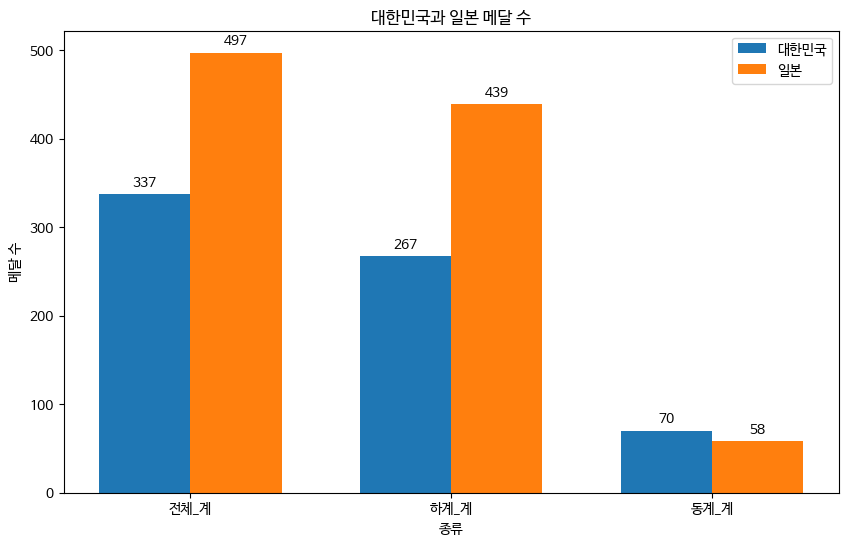

In [51]:

# 대한민국과 일본 데이터 추출
korea_data = df.loc[['대한민국 (KOR)'], ['전체_계', '하계_계', '동계_계']]
japan_data = df.loc[['일본 (JPN)'], ['전체_계', '하계_계', '동계_계']]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 대한민국과 일본 그래프 그리기
bar_width = 0.35
index = np.arange(len(korea_data.columns))
korea_bars = ax.bar(index, korea_data.iloc[0], bar_width, label='대한민국')
japan_bars = ax.bar(index + bar_width, japan_data.iloc[0], bar_width, label='일본')

# 각 막대 위에 값을 표시
for bars in [korea_bars, japan_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 축 및 레이블 설정
ax.set_xlabel('종류')
ax.set_ylabel('메달 수')
ax.set_title('대한민국과 일본 메달 수')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(korea_data.columns)
ax.legend()

# 그래프 표시
plt.show()




### 상위 10개 나라 지도에 표시

In [55]:
import folium

# 각 나라의 위도와 경도
locations = {
    "미국": [37.09024, -95.712891],
    "소련": [61.52401, 105.318756],
    "영국": [55.378051, -3.435973],
    "독일": [51.165691, 10.451526],
    "프랑스": [46.227638, 2.213749],
    "이탈리아": [41.87194, 12.56738],
    "스웨덴": [60.128161, 18.643501],
    "중국": [35.86166, 104.195397],
    "러시아": [61.52401, 105.318756],  # 러시아와 소련의 위치가 동일함
    "노르웨이": [60.472024, 8.468946]
}

# 지도 생성
m = folium.Map(location=[45, 0], zoom_start=3)

# 나라 위치 표시
for country, loc in locations.items():
    folium.Marker(location=loc, popup=country).add_to(m)

# 지도 저장
m.save('countries_map.html')
m
